# Starbucks Capstone Challenge

## CRISP-DM Framework

## SECTION 1: Business Understanding ##

We want to simulate how people make purchasing decisions and how those decisions are influenced by promotional offers.

Each person in this simulation has some hidden traits that influence their purchasing patterns and are associated with their observable traits.

There are three types of offers we want to send out: buy-one-get-one (BOGO), discount, and informational. In a BOGO offer, a user needs to spend a certain amount to get a reward equal to that threshold amount. In a discount, a user gains a reward equal to a fraction of the amount spent. In an informational offer, there is no reward, but neither is there a requisite amount that the user is expected to spend. Offers can be delivered via multiple channels.

The business problems we are trying to uncover are:

***QUESTION 1:  Which group of people are most responsive to each type of offer***


***QUESTION 2:  How best can we present each type of offer to the group.***


### Import Libraries ###

In [1]:
import pandas as pd
import numpy as np
import math
import json
import pandas as pd
import numpy as np
import math
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgbm
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from time import time
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
# % matplotlib inline

### Import JSON files ###

In [2]:
# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

## SECTION 2: Data Understanding ##

Portfolio dataset consists of 10 fields and 6 attributes.

Profile dataset consists of 17000 fields and 5 attributes.

Transcript dataset consists of 306534 fields and 4 attributes

### Access and Explore ###

In [3]:
num_rows_portfolio = portfolio.shape[0]
num_columns_portfolio = portfolio.shape[1]
print('There are {} fields and {} attributes for portfolio.'.format(num_rows_portfolio,num_columns_portfolio))

There are 10 fields and 6 attributes for portfolio.


In [4]:
num_rows_profile = profile.shape[0]
num_columns_profile = profile.shape[1]
print('There are {} fields and {} attributes for profile.'.format(num_rows_profile,num_columns_profile))

There are 17000 fields and 5 attributes for profile.


In [5]:
num_rows_transcript = transcript.shape[0]
num_columns_transcript = transcript.shape[1]
print('There are {} fields and {} attributes for transcript.'.format(num_rows_transcript,num_columns_transcript))

There are 306534 fields and 4 attributes for transcript.


In [6]:
# Attributes for portfolio data.
portfolio.columns

Index(['reward', 'channels', 'difficulty', 'duration', 'offer_type', 'id'], dtype='object')

In [7]:
# Attributes for profile data.
profile.columns

Index(['gender', 'age', 'id', 'became_member_on', 'income'], dtype='object')

In [8]:
# Attributes for transcript data.
transcript.columns

Index(['person', 'event', 'value', 'time'], dtype='object')

In [9]:
# Return the first 5 rows of portfolio
portfolio.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [10]:
# Return the last 5 rows of portfolio
portfolio.tail()

,reward,channels,difficulty,duration,offer_type,id
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [11]:
# Print information about the portfolio
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [12]:
# Return the shape of portfolio
portfolio.shape

(10, 6)

In [13]:
# Return description of portfolio
portfolio.describe()

,reward,difficulty,duration
count,10.000000,10.000000,10.000000
mean,4.200000,7.700000,6.500000
std,3.583915,5.831905,2.321398
min,0.000000,0.000000,3.000000
25%,2.000000,5.000000,5.000000
50%,4.000000,8.500000,7.000000
75%,5.000000,10.000000,7.000000
max,10.000000,20.000000,10.000000


In [14]:
# Return the first 5 rows of profile
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [15]:
# Return the last 5 rows of profile
profile.tail()

,gender,age,id,became_member_on,income
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0
16999,F,62,e4052622e5ba45a8b96b59aba68cf068,20170722,82000.0


In [16]:
# Return the shape of profile
profile.shape

(17000, 5)

In [17]:
# Return description of profile
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


In [18]:
# Return the first 5 rows of transcript
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [19]:
# Return the last 5 rows of transcript
transcript.tail()

,person,event,value,time
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714
306533,c02b10e8752c4d8e9b73f918558531f7,transaction,{'amount': 4.05},714


In [20]:
# Return the shape of transcript
transcript.shape

(306534, 4)

In [21]:
# Return description of transcript
transcript.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


In [22]:
# Returns the number of unique values for portfolio
portfolio.id.nunique()

10

In [23]:
# Returns the number of unique values for profile
profile.id.nunique()

17000

In [24]:
# Calculate the sum of the categorical values for portfolio
portfolio.isna().sum()

reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

In [25]:
# Calculate the sum of the categorical values for profile
profile.isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [26]:
# Calculate the sum of the categorical values for transcript
transcript.isna().sum()

person    0
event     0
value     0
time      0
dtype: int64

In [27]:
portfolio.groupby('offer_type')['id'].count()

offer_type
bogo             4
discount         4
informational    2
Name: id, dtype: int64

## SECTION 3: Data Preparation ##

### Data Cleaning ###

In [28]:
# Convert to datetime
profile.became_member_on = pd.to_datetime(profile.became_member_on, format = '%Y%m%d')

In [29]:
# Remove outliers (age 118)
remove = profile[profile.age == 118]
profile = profile[profile.age < 118].reset_index(drop=True)

In [30]:
# dividing age in 5 bins
profile['age_groups'] = pd.cut(profile.age, bins=[0, 18, 30, 50, 70, 110], labels=['Infants ', 'Children', 'Adolescents', 'Adults', 'Elderly'])

In [31]:
#Transform the became_member_on to Month / year Format.
#Claculating the cumulative number of days since the subscription start.
import datetime as dt
def member_days(profile):
    profile.became_member_on = pd.to_datetime(profile.became_member_on,format='%Y%m%d')
    profile['member_launch_Cum_days'] = (profile.became_member_on - dt.datetime(1971, 3, 31)).dt.days
    profile['member_launch_year'] = profile['became_member_on'].dt.year
    
    return profile.head()

In [32]:
member_days(profile)

,gender,age,id,became_member_on,income,age_groups,member_launch_Cum_days,member_launch_year
0,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,Adults,16908,2017
1,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,Elderly,16841,2017
2,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,Adults,17193,2018
3,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,Adults,17117,2018
4,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,Adults,17027,2017


In [33]:
# store 0 and 1s in new columns
profile['missing'] = profile['age'].apply(lambda val: 1 if pd.isna(val) else 0)
dropped = profile[profile['missing'] == 1].index
# cleaned Dataset
clean_profile = profile.drop(dropped)

In [34]:
clean_profile.head()

,gender,age,id,became_member_on,income,age_groups,member_launch_Cum_days,member_launch_year,missing
0,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,Adults,16908,2017,0
1,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,Elderly,16841,2017,0
2,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,Adults,17193,2018,0
3,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,Adults,17117,2018,0
4,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,Adults,17027,2017,0


In [35]:
df1 = portfolio.copy()

In [36]:
dummy = pd.get_dummies(df1.channels.apply(pd.Series).stack()).sum(level=0)
df1 = pd.concat([df1, dummy], axis=1)
df1 = df1.drop(columns='channels')

In [37]:
df1 = df1.rename(columns={'id':'offer_id'})

In [38]:
df1

,reward,difficulty,duration,offer_type,offer_id,email,mobile,social,web
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1
5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1
7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0
8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1
9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,0,1


In [39]:
# cleaning transcript data
def clean_transcript(transcript):
    # input: transcript dataframe
    # output: offer id, amount - cleaned offer dataframe, dropping value
    offer = transcript[transcript['value'].apply(lambda x: True 
                                                 if ('offer id' in x)
                                                 or ('offer_id' in x) 
                                                 or ('amount' in x)  
                                                 else False)]
    offer['offer_id'] = offer['value'].apply(lambda x: x['offer id'] 
                                             if ('offer id' in x) 
                                             else (x['offer_id'] 
                                             if ('offer_id' in x)  else '0'))
    offer['amount'] = offer['value'].apply(lambda x: x['amount'] 
                                           if ('amount' in x) 
                                           else '0')
    return offer

In [40]:
Clean_transcript = clean_transcript(transcript)
Updated_transcript=Clean_transcript.drop(['value'],axis=1)

In [41]:
Updated_transcript.rename(columns={'person':'customer'}, inplace=True)

In [42]:
Updated_transcript.head()

,customer,event,time,offer_id,amount
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,0
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0


In [43]:
Updated_transcript.tail()

,customer,event,time,offer_id,amount
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,0,1.59
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,0,9.53
306531,a00058cf10334a308c68e7631c529907,transaction,714,0,3.61
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,0,3.53
306533,c02b10e8752c4d8e9b73f918558531f7,transaction,714,0,4.05


In [44]:
# cleaning portfolio data
def clean_Portfolio(portfolio):
    # input: portfolio dataframe
    # output: cleaned portfolio
    
    # change the duration from day to hour
    updated_portfolio = portfolio.copy()
    updated_portfolio['duration'] = updated_portfolio['duration'] * 24
    
    # apply one hot encoding to channels column
    updated_portfolio['web'] = updated_portfolio['channels'].apply(lambda x: 1 
                                                                   if 'web' in x 
                                                                   else 0)
    updated_portfolio['email'] = updated_portfolio['channels'].apply(lambda x: 1 
                                                                     if 'email' in x 
                                                                     else 0)
    updated_portfolio['mobile'] = updated_portfolio['channels'].apply(lambda x: 1 
                                                                      if 'mobile' in 
                                                                      x else 0)
    updated_portfolio['social'] = updated_portfolio['channels'].apply(lambda x: 1 
                                                                      if 'social' in x 
                                                                      else 0)
    
    updated_portfolio.drop(['channels'], axis=1, inplace=True)
    
    return updated_portfolio

In [45]:
updated_portfolio=clean_Portfolio(portfolio)

In [46]:
# rename id column to offer_id
updated_portfolio.rename(columns={'id':'offer_id'}, inplace=True)

In [47]:
updated_portfolio.head()

,reward,difficulty,duration,offer_type,offer_id,web,email,mobile,social
0,10,10,168,bogo,ae264e3637204a6fb9bb56bc8210ddfd,0,1,1,1
1,10,10,120,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,96,informational,3f207df678b143eea3cee63160fa8bed,1,1,1,0
3,5,5,168,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,1,0
4,5,20,240,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,1,0,0


In [48]:
updated_portfolio.tail()

,reward,difficulty,duration,offer_type,offer_id,web,email,mobile,social
5,3,7,168,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1
6,2,10,240,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1
7,0,0,72,informational,5a8bc65990b245e5a138643cd4eb9837,0,1,1,1
8,5,5,120,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1
9,2,10,168,discount,2906b810c7d4411798c6938adc9daaa5,1,1,1,0


In [49]:
df1 = transcript[transcript.event == 'transaction']
df2 = transcript[transcript.event == 'offer received']
df3 = transcript[transcript.event == 'offer viewed']
df4 = transcript[transcript.event == 'offer completed']
df1['amount'] = df1.value.apply(lambda x:list(x.values())[0])
df2['offer_id'] = df2.value.apply(lambda x:list(x.values())[0])
df3['offer_id'] = df3.value.apply(lambda x:list(x.values())[0])
df4['offer_id'] = df4.value.apply(lambda x:list(x.values())[0])
df4['reward'] = df4.value.apply(lambda x:list(x.values())[1])

In [50]:
df = pd.concat([df1,df2,df3,df4])
df = df[['event' , 'person' , 'offer_id' ,'time', 'amount' , 'reward' , 'value']]
df.drop(columns='value' , inplace=True)

In [51]:
# Fix the Offer_ids
offer_id = df2['offer_id'].unique()
offer_id

array(['9b98b8c7a33c4b65b9aebfe6a799e6d9',
       '0b1e1539f2cc45b7b9fa7c272da2e1d7',
       '2906b810c7d4411798c6938adc9daaa5',
       'fafdcd668e3743c1bb461111dcafc2a4',
       '4d5c57ea9a6940dd891ad53e9dbe8da0',
       'f19421c1d4aa40978ebb69ca19b0e20d',
       '2298d6c36e964ae4a3e7e9706d1fb8c2',
       '3f207df678b143eea3cee63160fa8bed',
       'ae264e3637204a6fb9bb56bc8210ddfd',
       '5a8bc65990b245e5a138643cd4eb9837'], dtype=object)

In [52]:
# Convert Offer_ids from series to dictionary
offer_dict = pd.Series(offer_id ).to_dict()
offer_dict

{0: '9b98b8c7a33c4b65b9aebfe6a799e6d9',
 1: '0b1e1539f2cc45b7b9fa7c272da2e1d7',
 2: '2906b810c7d4411798c6938adc9daaa5',
 3: 'fafdcd668e3743c1bb461111dcafc2a4',
 4: '4d5c57ea9a6940dd891ad53e9dbe8da0',
 5: 'f19421c1d4aa40978ebb69ca19b0e20d',
 6: '2298d6c36e964ae4a3e7e9706d1fb8c2',
 7: '3f207df678b143eea3cee63160fa8bed',
 8: 'ae264e3637204a6fb9bb56bc8210ddfd',
 9: '5a8bc65990b245e5a138643cd4eb9837'}

In [53]:
# Map the Offer_ids dataframe to the dictionary
df4['offer_id'] = df3['offer_id'].map(offer_dict)
df4.head()

,person,event,value,time,offer_id,reward
12658,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,{'offer_id': '2906b810c7d4411798c6938adc9daaa5...,0,NaN,2
12672,fe97aa22dd3e48c8b143116a8403dd52,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,0,NaN,2
12679,629fc02d56414d91bca360decdfa9288,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,0,NaN,5
12692,676506bad68e4161b9bbaffeb039626b,offer completed,{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...,0,NaN,10
12697,8f7dd3b2afe14c078eb4f6e6fe4ba97d,offer completed,{'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0...,0,NaN,10


In [54]:
# Replace Offer_ids with numpy NaN
df4['offer_id'] = df2['offer_id'].replace(1, np.nan)

In [55]:
df4['offer_id'].unique()

array([nan], dtype=object)

In [56]:
event_ids = df1['event'].unique()
event_ids

array(['transaction'], dtype=object)

In [57]:
event_dict = pd.Series(event_ids).to_dict()
event_dict

{0: 'transaction'}

In [58]:
event_dict = dict([(value, key) for key, value in event_dict.items()]) 
event_dict

{'transaction': 0}

In [59]:
# map event_ids to the encoded event ids
df1['event_id'] = df1['event'].map(event_dict)

In [60]:
df1['event_id'].head()

12654    0
12657    0
12659    0
12670    0
12671    0
Name: event_id, dtype: int64

### Data Wrangling ###

In [61]:
# function to check duplicates
def check_duplicates(df):
    for col in df.columns:
        if type(df[col][0]) is not list and type(df[col][0]) is not dict:
            print('{} duplicates: {}'.format(col, df.duplicated(col).sum()))

In [62]:
# function to check null values
def check_null(df):
    total = len(df)
    for col in df.columns:
        nan_rows = df[col].isnull().sum()
        print('{} has {} % of null values'.format(col, (nan_rows/total)*100))


In [63]:
# Rename 'person' column name to 'customer_id'
transcript.rename(columns = {'person': 'customer_id'}, inplace = True)

In [64]:
# function for creating new columns
def create_rewards_col(df):
    rewards_list = []
    for i in range(len(df.value)):
            rewards_list.append(df.value[i].get('rewards'))
    return rewards_list

def create_amount_col(df):
    amount_list = []
    for i in range(len(df.value)):
            amount_list.append(df.value[i].get('amount'))
    return amount_list

def create_order_id_col(df):
    order_id_list = []
    keys_to_lookup = ['offer id', 'offer_id']

    for i in range(len(df.value)):
        if keys_to_lookup[0] in df.value[i]:
            order_id_list.append(df.value[i].get(keys_to_lookup[0]))
        elif keys_to_lookup[1] in df.value[i]:
            order_id_list.append(df.value[i].get(keys_to_lookup[1]))
        else:
            order_id_list.append(np.nan)
    return order_id_list

In [65]:
transcript['rewards'] = create_rewards_col(transcript)
transcript['amount'] = create_amount_col(transcript)
transcript['offer_id'] = create_order_id_col(transcript)

In [66]:
transcript.head()

,customer_id,event,value,time,rewards,amount,offer_id
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,None,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,None,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,None,NaN,2906b810c7d4411798c6938adc9daaa5
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,None,NaN,fafdcd668e3743c1bb461111dcafc2a4
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,None,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0


In [67]:
transcript.rewards.isnull().sum()

306534

df.drop(columns = ['value', 'rewards'], inplace = True)

df.head()

In [68]:
# Convert amount column to float.
df.amount.astype('float')
df.amount.dtype

dtype('float64')

In [69]:
# Drop all rows from transcript where 'customer_id' not in profile.id
transcript = transcript[transcript.customer_id.isin(profile.id)]

In [70]:
# Convert 'time' column from hours to days.
transcript.time /= 24
transcript.tail()

,customer_id,event,value,time,rewards,amount,offer_id
306527,24f56b5e1849462093931b164eb803b5,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,29.75,None,NaN,fafdcd668e3743c1bb461111dcafc2a4
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},29.75,None,1.59,NaN
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},29.75,None,9.53,NaN
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},29.75,None,3.61,NaN
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},29.75,None,3.53,NaN


In [71]:
# Split event column into 4 columns: 'offer_received', 'offer_viewed', 'offer_completed' and 'transaction'.
transcript['offer_received'] = transcript['event'].apply(lambda x: 1 if x == 'offer received' else 0)
transcript['offer_viewed'] = transcript['event'].apply(lambda x: 1 if x == 'offer viewed' else 0)
transcript['offer_completed'] = transcript['event'].apply(lambda x: 1 if x == 'offer completed' else 0)
transcript['transaction'] = transcript['event'].apply(lambda x: 1 if x == 'transaction' else 0)

In [72]:
# drop event column
transcript.drop(columns = ['event'], inplace = True)

In [73]:
transcript.head()

,customer_id,value,time,rewards,amount,offer_id,offer_received,offer_viewed,offer_completed,transaction
0,78afa995795e4d85b5d9ceeca43f5fef,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0.0,None,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,0,0,0
2,e2127556f4f64592b11af22de27a7932,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0.0,None,NaN,2906b810c7d4411798c6938adc9daaa5,1,0,0,0
5,389bc3fa690240e798340f5a15918d5c,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},0.0,None,NaN,f19421c1d4aa40978ebb69ca19b0e20d,1,0,0,0
7,2eeac8d8feae4a8cad5a6af0499a211d,{'offer id': '3f207df678b143eea3cee63160fa8bed'},0.0,None,NaN,3f207df678b143eea3cee63160fa8bed,1,0,0,0
8,aa4862eba776480b8bb9c68455b8c2e1,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0.0,None,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,0


In [74]:
# Drop duplicates rows if any.
df.duplicated().sum()
df.drop_duplicates(inplace = True)

In [75]:
transcript.head()

,customer_id,value,time,rewards,amount,offer_id,offer_received,offer_viewed,offer_completed,transaction
0,78afa995795e4d85b5d9ceeca43f5fef,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0.0,None,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,0,0,0
2,e2127556f4f64592b11af22de27a7932,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0.0,None,NaN,2906b810c7d4411798c6938adc9daaa5,1,0,0,0
5,389bc3fa690240e798340f5a15918d5c,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},0.0,None,NaN,f19421c1d4aa40978ebb69ca19b0e20d,1,0,0,0
7,2eeac8d8feae4a8cad5a6af0499a211d,{'offer id': '3f207df678b143eea3cee63160fa8bed'},0.0,None,NaN,3f207df678b143eea3cee63160fa8bed,1,0,0,0
8,aa4862eba776480b8bb9c68455b8c2e1,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0.0,None,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,0


In [76]:
transcript.tail()

,customer_id,value,time,rewards,amount,offer_id,offer_received,offer_viewed,offer_completed,transaction
306527,24f56b5e1849462093931b164eb803b5,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,29.75,None,NaN,fafdcd668e3743c1bb461111dcafc2a4,0,0,1,0
306529,b3a1272bc9904337b331bf348c3e8c17,{'amount': 1.5899999999999999},29.75,None,1.59,NaN,0,0,0,1
306530,68213b08d99a4ae1b0dcb72aebd9aa35,{'amount': 9.53},29.75,None,9.53,NaN,0,0,0,1
306531,a00058cf10334a308c68e7631c529907,{'amount': 3.61},29.75,None,3.61,NaN,0,0,0,1
306532,76ddbd6576844afe811f1a3c0fbb5bec,{'amount': 3.5300000000000002},29.75,None,3.53,NaN,0,0,0,1


In [77]:
merged = pd.merge(transcript, profile,left_on='customer_id' , right_on='id',how='inner')
merged.drop(columns=['id'] , inplace=True)
# Fill nans with 0
merged.rewards.fillna(0 , inplace=True)
merged.amount.fillna(0 , inplace=True)

In [78]:
# sort values
merged.sort_values(by=['time'] , ascending=True , inplace=True)

list1 = ['transaction', 'amount']

for i in list1:
    merged[i] = merged.groupby('customer_id')[i].cumsum()

In [79]:
merged.dropna(subset=['offer_id'] ,inplace=True)

In [80]:
merged = merged.merge(portfolio , left_on='offer_id' , right_on='id'  ,how='left')

In [81]:
def offers_transformation(df):
    '''
    Function: to transform the ofers
    
    Returns: The transformed offers
    '''
    
    df['bogo_received'] = 0
    df['bogo_completed'] = 0

    df['discount_received'] = 0
    df['discount_completed'] = 0

    for index , row in df.iterrows():
        if(row['offer_type'] == 'bogo'):
            df.loc[index , 'bogo_completed'] = row['offer completed']
            df.loc[index , 'bogo_received'] = row['offer received']

        elif(row['offer_type'] == 'discount'):
            df.loc[index , 'discount_completed'] = row['offer completed']
            df.loc[index , 'discount_received'] = row['offer received']
        
        
        
    return df.groupby(['person']).agg(
    {
        'age':'last',
        'became_member_on':'last',
        'gender':'last',
        'income':'last', 
        'bogo_received':sum,
        'bogo_completed':sum,
        'discount_received':sum,
        'discount_completed':sum,        
    }
).reset_index()

In [82]:
data = pd.read_csv('data/data.csv')

## SECTION 4: Evaluation ##

### Data Visualization ###

In [83]:
def horizontal_bar_plot(df, colName, pltTitle, pltfigsize=[5,5], bInvertYAxis=True, fntSize=12, fntWeight='bold'):
    """
    Creates a horizontal bar plot with counts of categories
    
    Parameters
    ----------
    df: The dataframe with categories.
    
    colName: The name of the column containing the categories.
    
    pltTitle: The plot title.
    
    pltfigsize: The figure size of the plot (default is [5,5]).
    
    bInvertYAxis: A flag to indicating whether to invert the Y-Axis or not.
    
    fntSize: The font size of text (default to 12 point font size)
    
    fntWeight: The weight of font (default to 'bold', it could be 'italic')
    
    Returns
    -------
    None
    """
    plt.figure(figsize=pltfigsize)
    fig, ax = plt.subplots()    
    y_counts = df[colName].value_counts()
    if bInvertYAxis == True:
        y_counts.plot(kind='barh').invert_yaxis()
    else:
         y_counts.plot(kind='barh')   
    for i, v in enumerate(y_counts):
        ax.text(v, i, str(v), color='black', fontsize=fntSize, fontweight=fntWeight)
        plt.title(pltTitle)

<Figure size 500x500 with 0 Axes>

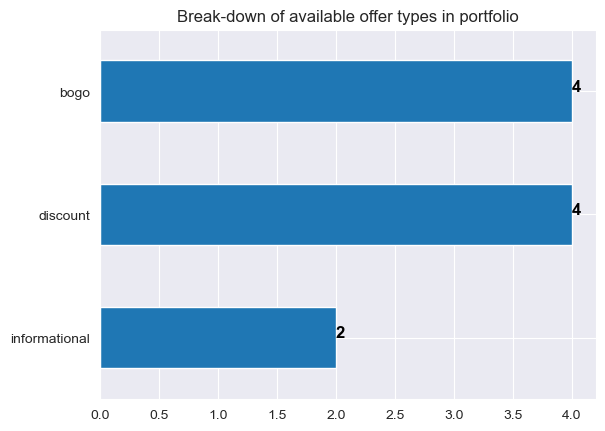

In [84]:
horizontal_bar_plot(portfolio, 'offer_type', "Break-down of available offer types in portfolio")

<Figure size 500x500 with 0 Axes>

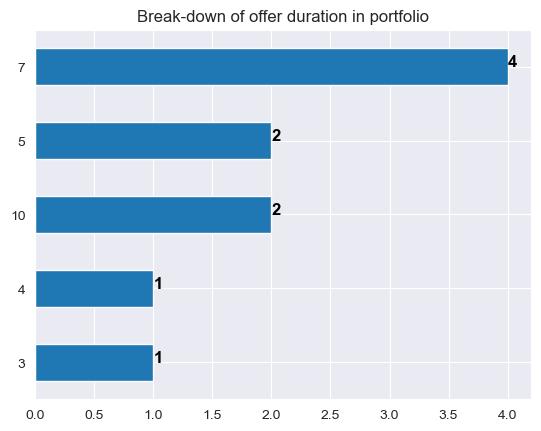

In [85]:
horizontal_bar_plot(portfolio, 'duration', "Break-down of offer duration in portfolio")

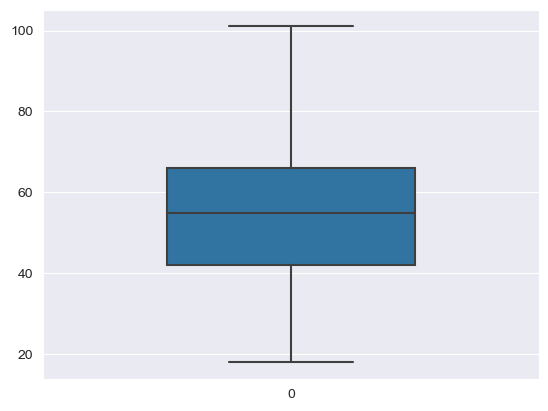

In [86]:
# create a boxplot to find the outliers in our data frame
sns.boxplot(profile['age'], width=0.5);

In [87]:
transcript.head()

,customer_id,value,time,rewards,amount,offer_id,offer_received,offer_viewed,offer_completed,transaction
0,78afa995795e4d85b5d9ceeca43f5fef,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0.0,None,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,0,0,0
2,e2127556f4f64592b11af22de27a7932,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0.0,None,NaN,2906b810c7d4411798c6938adc9daaa5,1,0,0,0
5,389bc3fa690240e798340f5a15918d5c,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},0.0,None,NaN,f19421c1d4aa40978ebb69ca19b0e20d,1,0,0,0
7,2eeac8d8feae4a8cad5a6af0499a211d,{'offer id': '3f207df678b143eea3cee63160fa8bed'},0.0,None,NaN,3f207df678b143eea3cee63160fa8bed,1,0,0,0
8,aa4862eba776480b8bb9c68455b8c2e1,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0.0,None,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,0


<Axes: >

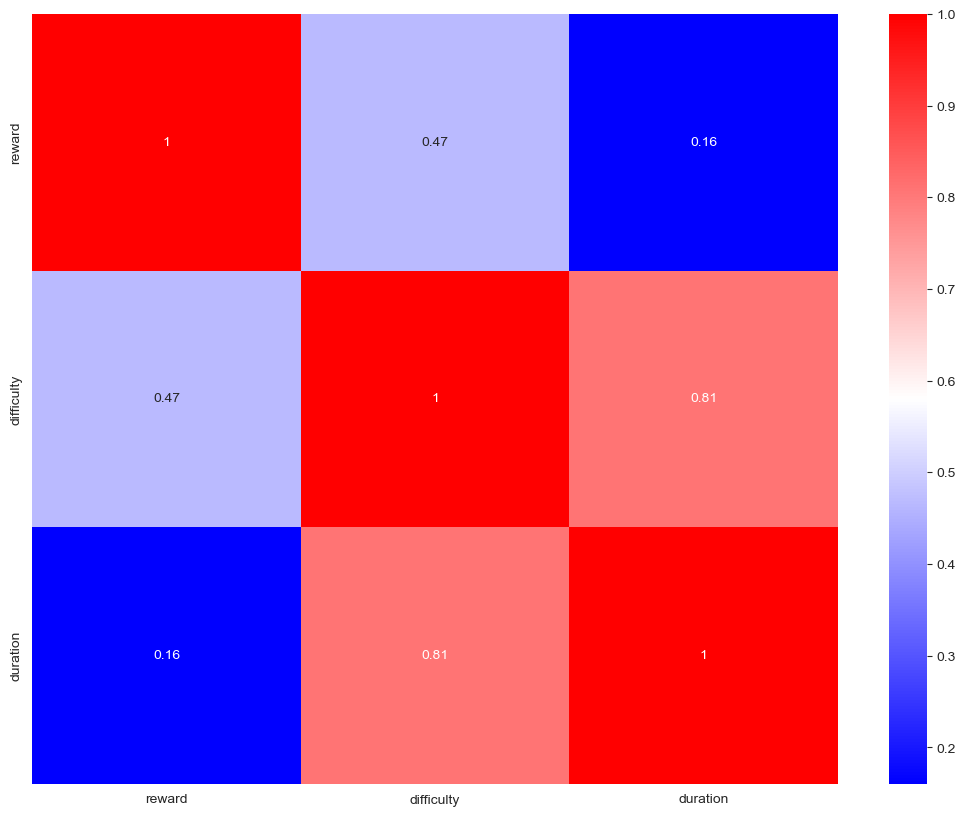

In [88]:
# Plot the heatmap for portfolio
plt.figure(figsize=(13, 10))
sns.heatmap(portfolio.corr(), cmap='bwr', annot=True)

<Axes: >

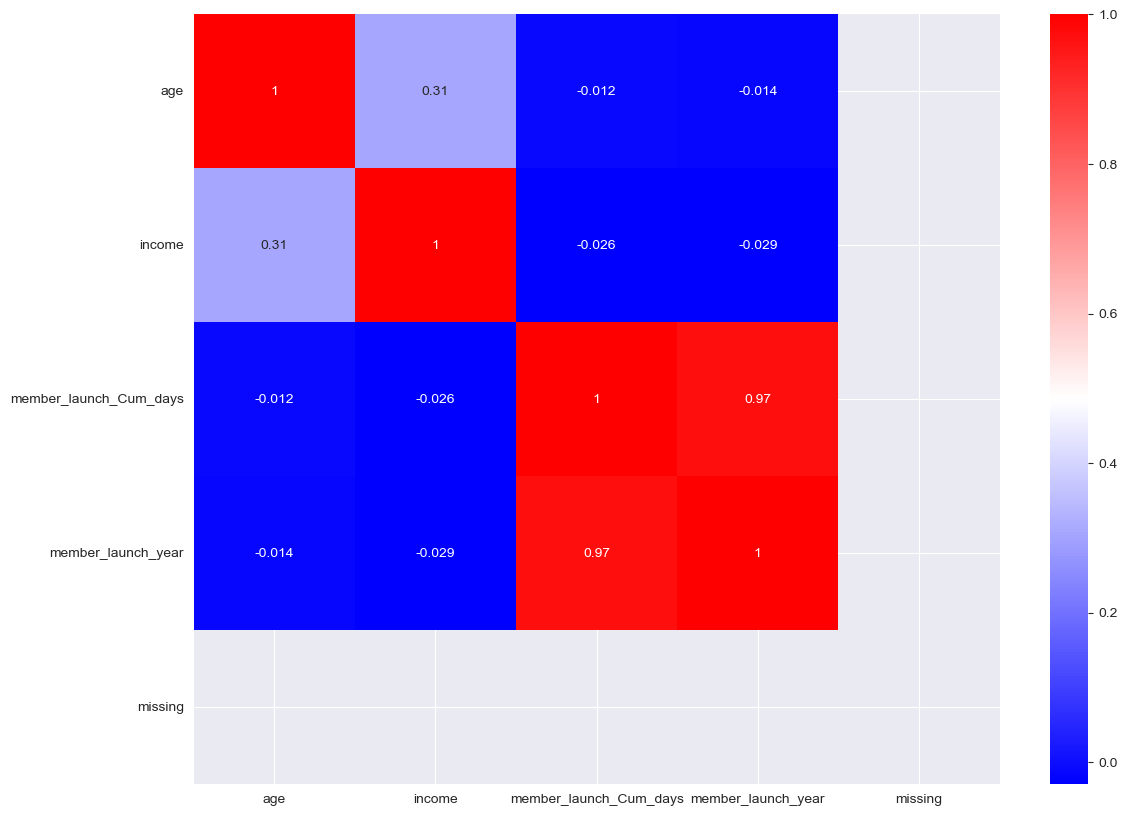

In [89]:
# Plot the heatmap for profile
plt.figure(figsize=(13, 10))
sns.heatmap(profile.corr(), cmap='bwr', annot=True)

<Axes: >

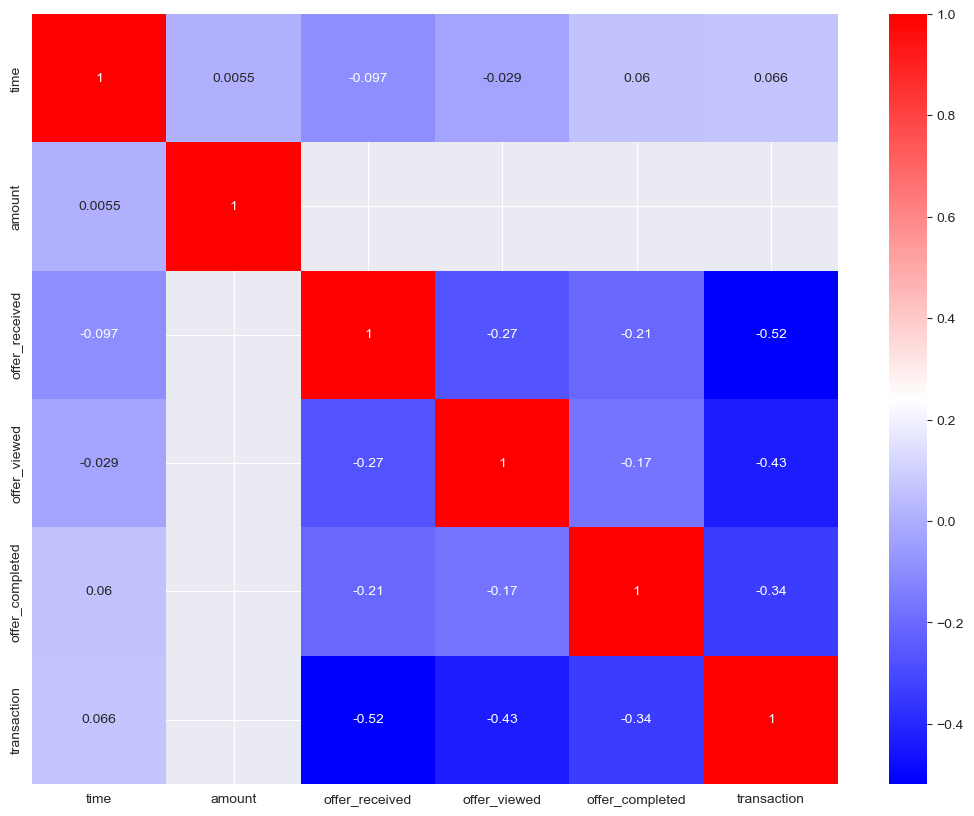

In [90]:
# Plot the heatmap for transcript
plt.figure(figsize=(13, 10))
sns.heatmap( transcript.corr(), cmap='bwr', annot=True)

### QUESTION 1:  Which group of people are most responsive to each type of offer ###

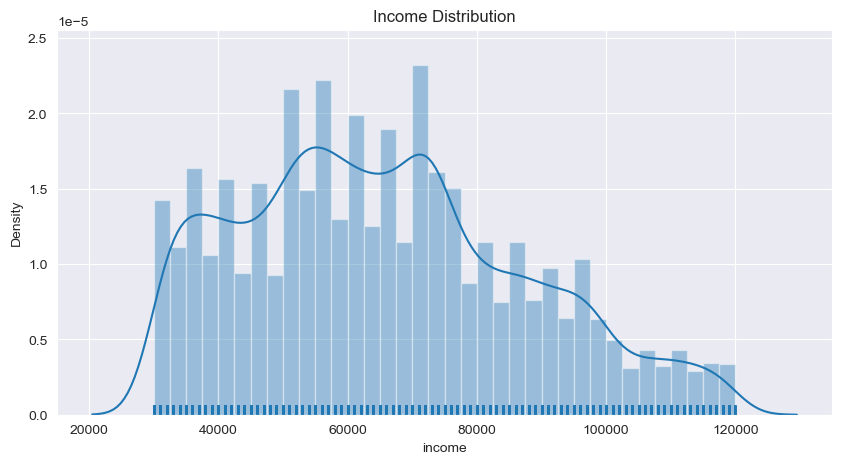

In [91]:
# Profile and Income Distribution
fig = plt.figure(figsize = (10,5))
sns.distplot(a=profile['income'],hist=True,kde=True,rug=True)
plt.title('Income Distribution');

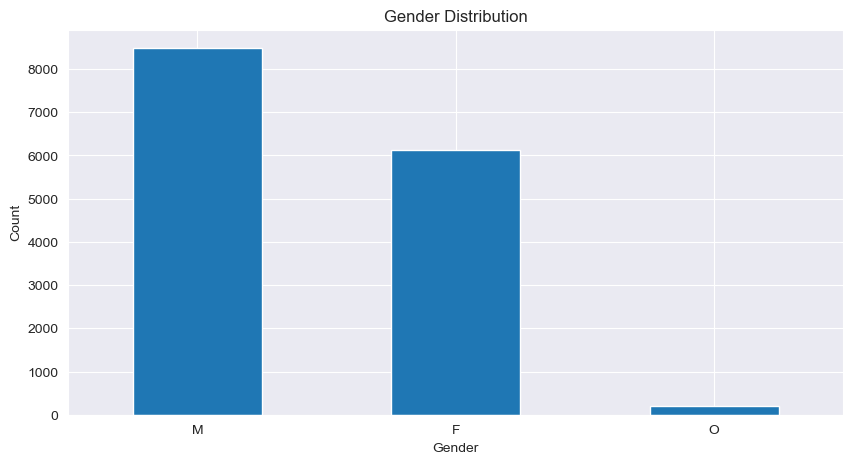

In [92]:
# Profile and Gender Distribution
fig = plt.figure(figsize = (10,5))
ax = profile.gender.value_counts().plot(kind = 'bar')

plt.xticks(rotation = 360)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution');

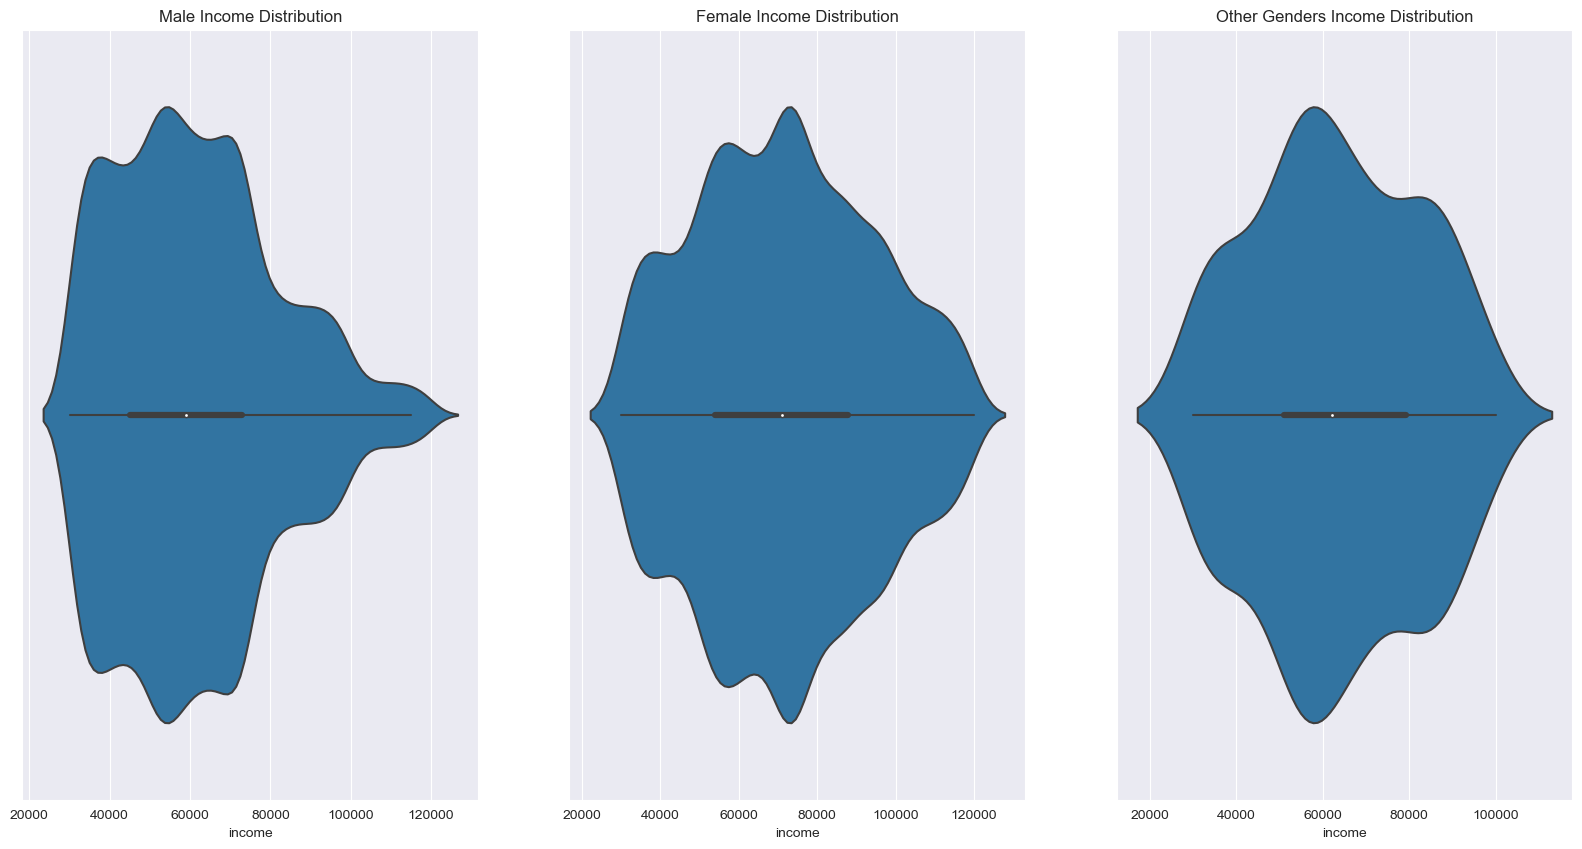

In [93]:
# Profile Gender and Income Distribution
fig, ax = plt.subplots(1, 3, figsize = [20, 10])
ax1 = sns.violinplot(x = profile.query('gender == "M"')['income'], ax = ax[0])
ax1.title.set_text('Male Income Distribution');
ax2 = sns.violinplot(x = profile.query('gender == "F"')['income'], ax = ax[1])
ax2.title.set_text('Female Income Distribution');
ax3 = sns.violinplot(x = profile.query('gender == "O"')['income'], ax = ax[2])
ax3.title.set_text('Other Genders Income Distribution');

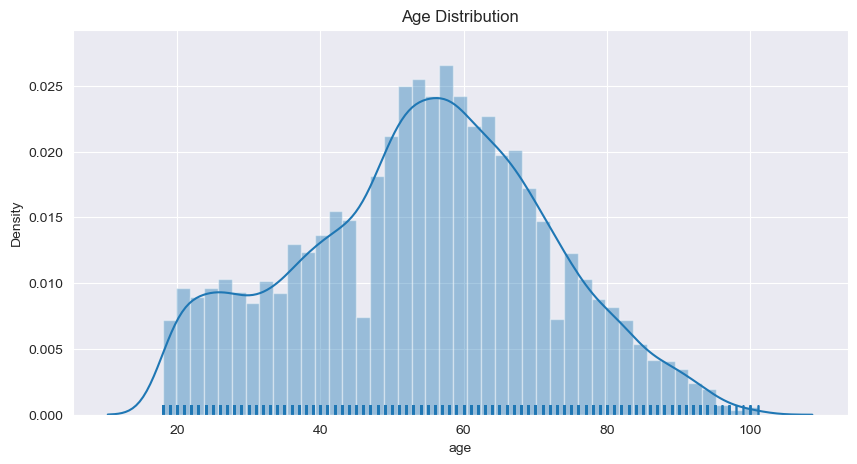

In [94]:
# Profile Age Distribution
fig = plt.figure(figsize = (10,5))
sns.distplot(a=profile['age'],hist=True,kde=True,rug=True)
plt.title('Age Distribution');

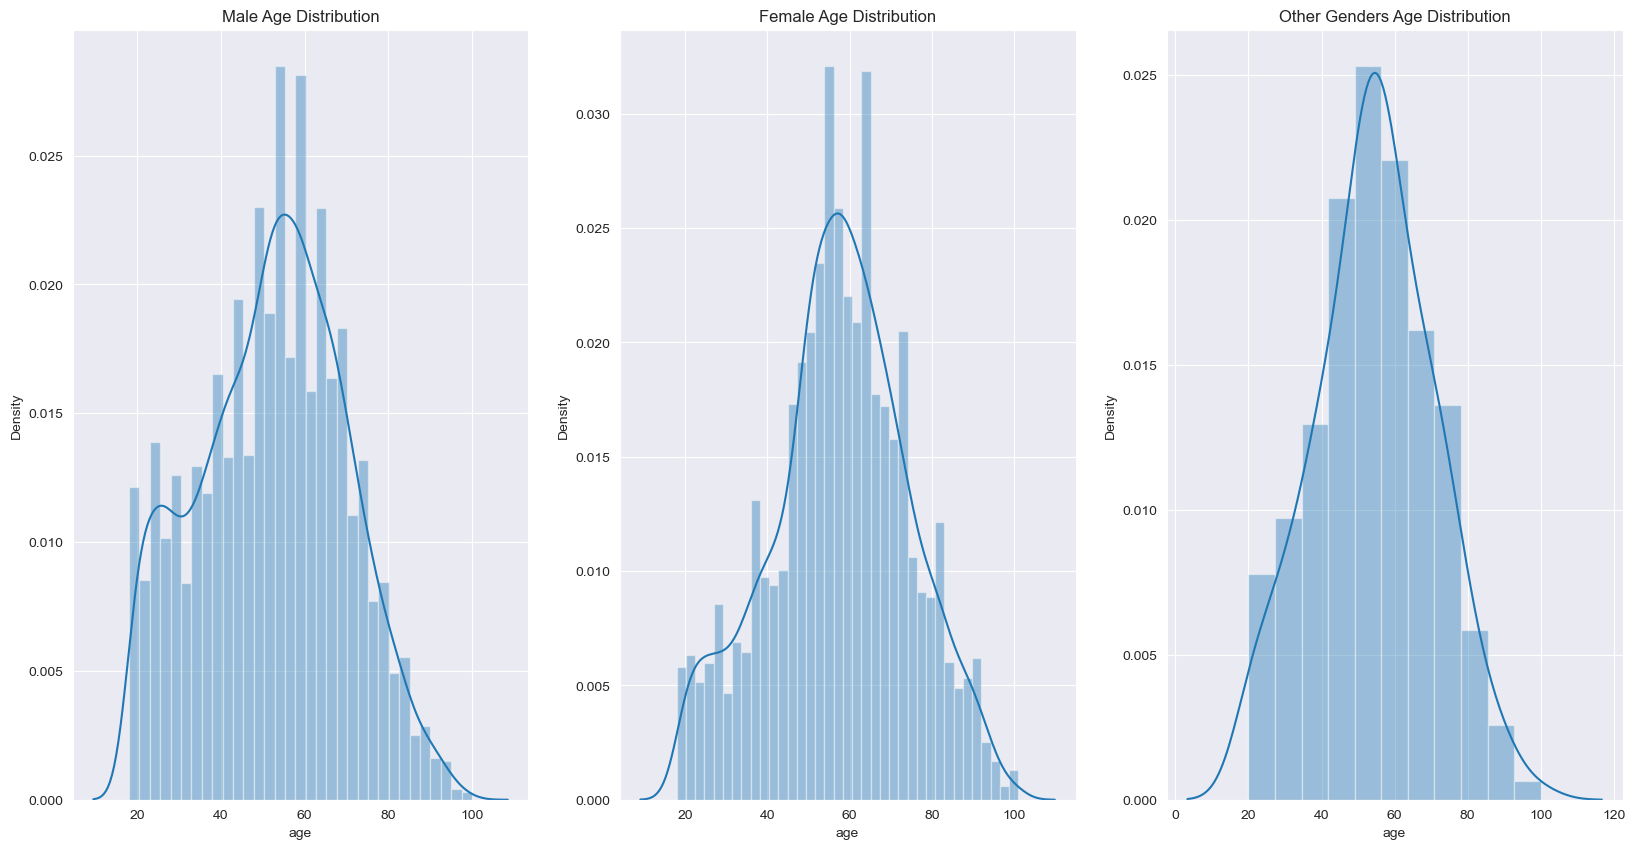

In [95]:
# Gender Age Distribution
fig, ax = plt.subplots(1, 3, figsize = [20, 10])
ax1 = sns.distplot(profile.query('gender == "M"')['age'], ax = ax[0])
ax1.title.set_text('Male Age Distribution');
ax2 = sns.distplot(profile.query('gender == "F"')['age'], ax = ax[1])
ax2.title.set_text('Female Age Distribution');
ax3 = sns.distplot(profile.query('gender == "O"')['age'], ax = ax[2])
ax3.title.set_text('Other Genders Age Distribution');

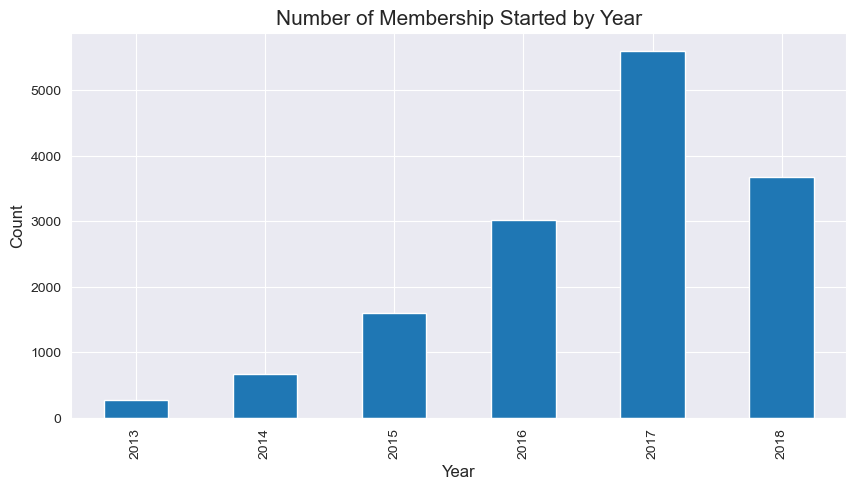

In [96]:
# Profile Membership Distribution
fig = plt.figure(figsize = (10,5))

ax = profile['became_member_on'].groupby(profile['became_member_on'].dt.year).count().plot(kind = 'bar')
plt.title('Number of Membership Started by Year', fontsize = 15)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Count', fontsize = 12);

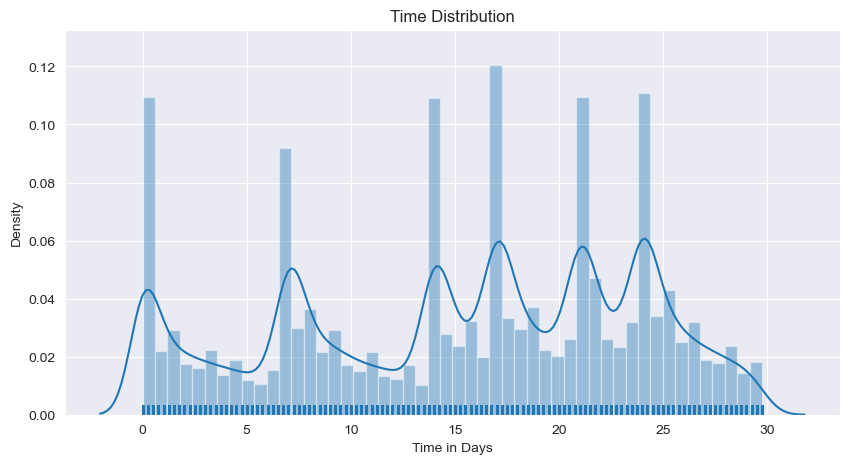

In [97]:
# Profile Time Distribution
fig = plt.figure(figsize = (10,5))
sns.distplot(a=transcript['time'],hist=True,kde=True,rug=True)
plt.title('Time Distribution')
plt.xlabel("Time in Days");

In [98]:
portfolio.rename(columns = {'id': 'offer_id'}, inplace = True)

In [99]:
# Split 'channels' column into 4 columns: 'web', 'mobile', 'email' and 'social'
portfolio['web'] = portfolio.channels.apply(lambda x: 1 if 'web' in x else 0)
portfolio['mobile'] = portfolio.channels.apply(lambda x: 1 if 'mobile' in x else 0)
portfolio['email'] = portfolio.channels.apply(lambda x: 1 if 'email' in x else 0)
portfolio['social'] = portfolio.channels.apply(lambda x: 1 if 'social' in x else 0)

# drop channels column
portfolio.drop(columns = ['channels'], inplace = True)


In [100]:
transcript_portfolio = transcript.merge(portfolio, how = 'left', on = 'offer_id')

### QUESTION 2:  How best can we present each type of offer to the group ###

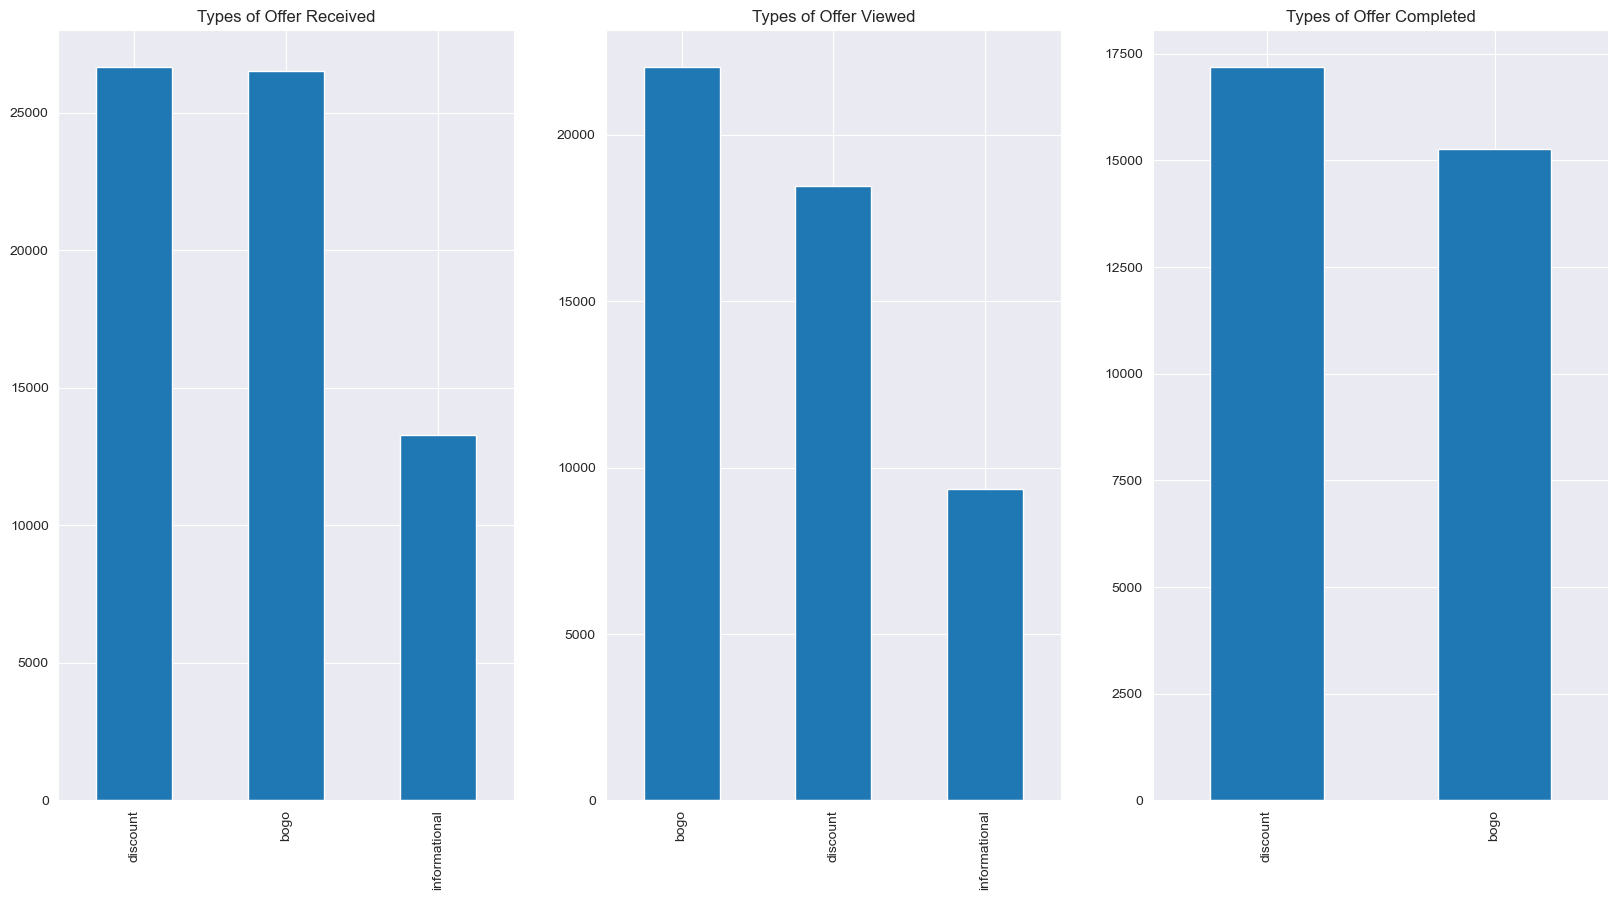

In [101]:
# Types of Offer Distribution
fig, ax = plt.subplots(1, 3, figsize = [20, 10])
ax1 = transcript_portfolio[transcript_portfolio.offer_received == 1].offer_type.value_counts().plot(kind = 'bar',
                                                                                                   ax = ax[0])
ax1.title.set_text('Types of Offer Received');

ax2 = transcript_portfolio[transcript_portfolio.offer_viewed == 1].offer_type.value_counts().plot(kind = 'bar',
                                                                                                 ax = ax[1])
ax2.title.set_text('Types of Offer Viewed');

ax3 = transcript_portfolio[transcript_portfolio.offer_completed == 1].offer_type.value_counts().plot(kind = 'bar',
                                                                                                 ax = ax[2])
ax3.title.set_text('Types of Offer Completed');

###  Exploratory Data Analysis (EDA) ###

In [102]:
def count_plot_legend(df, col, mapping):
    class TextHandler(HandlerBase):
        def create_artists(self, legend, tup ,xdescent, ydescent,
                           width, height, fontsize,trans):
            tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                      ha="center", va="center", color=tup[1], fontweight="bold")
            return [tx]



    base_color = sns.color_palette()[0]
    ax = sns.countplot(x = df[col], color= base_color)


    handltext = list(mapping.values())
    handltext = list(map(str, handltext))
    labels = list(mapping.keys())


    t = ax.get_xticklabels()
    labeldic = dict(zip(handltext, labels))
    labels = [labeldic[h.get_text()]  for h in t]
    handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,ax.patches)]

    ax.legend(handles, labels, handler_map={tuple : TextHandler()})

    plt.show()


In [103]:
value_columns = ['time', 'amount']

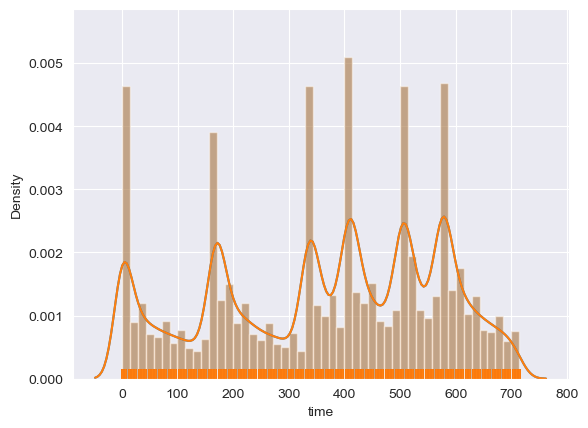

In [104]:
for col in value_columns:
    sns.distplot(a=df['time'],hist=True,kde=True,rug=True)

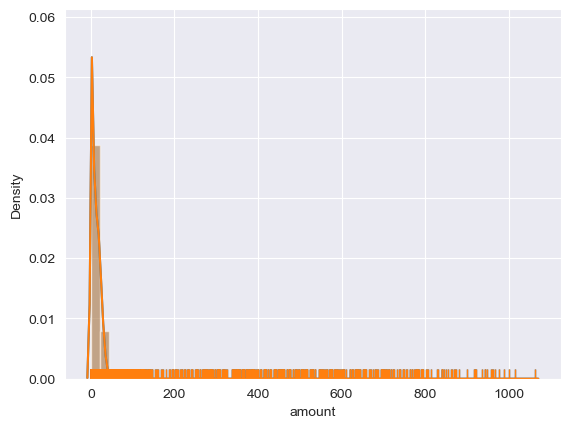

In [105]:
for col in value_columns:
    sns.distplot(a=df['amount'],hist=True,kde=True,rug=True)

In [106]:
df['respond_to_offer'] = 0

event            respond_to_offer
offer completed  0                    33182
offer received   0                    76277
offer viewed     0                    57725
transaction      0                   138953
dtype: int64
***********************
person                            respond_to_offer
0009655768c64bdeb2e877511632db8f  0                   20
00116118485d4dfda04fdbaba9a87b5c  0                    7
0011e0d4e6b944f998e987f904e8c1e5  0                   18
0020c2b971eb4e9188eac86d93036a77  0                   19
0020ccbbb6d84e358d3414a3ff76cffd  0                   23
                                                      ..
fff3ba4757bd42088c044ca26d73817a  0                   23
fff7576017104bcc8677a8d63322b5e1  0                   18
fff8957ea8b240a6b5e634b6ee8eafcf  0                   10
fffad4f4828548d1b5583907f2e9906b  0                   23
ffff82501cea40309d5fdd7edcca4a07  0                   33
Length: 17000, dtype: int64
***********************
offer_id               

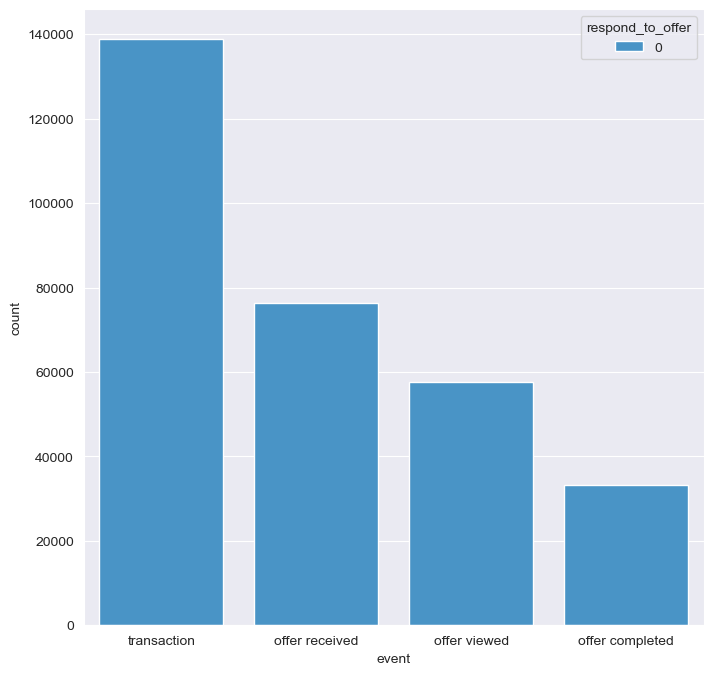

In [ ]:
flatui = ["#3498db", "#9b59b6", "#f1c40f", "#e67e22", "#16a085", "#e74c3c"]
for var in df:
    temp = df.groupby([var,'respond_to_offer']).size()
    print(temp)
    print('***********************')
    plt.figure(figsize=(8,8))
    sns.countplot(data=df,x=var,hue='respond_to_offer', palette=flatui)

###  Feature Engineering ###

In [ ]:
profile.rename(columns={'id':'person'},inplace=True)

#create function to generate the length of time since the user become the member
def member_since(df):
    '''
    inputs:
    - df: dataframe to generate the length of time since the user become the member
    outputs:
    - Returns dataframe with became_member_on column transformed to be tenure in days

    '''
    #merge to get user demographic profile
    df =df.merge(profile,how='left',on='person')

    #convert became_member_on into member tenure
    df['year']=pd.Series([int(str(x)[:4]) for x in df['became_member_on']])
    df['month']=pd.Series([int(str(x)[-4:-2]) for x in df['became_member_on']])
    df['day']=pd.Series([int(str(x)[-2:]) for x in df['became_member_on']])
    df = df.drop('became_member_on', axis=1, inplace=False)
    df.loc[df['year'] == 2023, 'membership_days'] = (30*df['month'])+df['day']
    df.loc[df['year'] != 2023, 'membership_days'] = ((2023-df['year'])*365)+(30*df['month'])+df['day']
    df = df.drop(['year','month','day'], axis=1, inplace=False)

    return df

In [ ]:
df.to_csv('data/data.csv', index=False)

In [ ]:
data = pd.read_csv('data/data.csv')

###  Feature Scaling ###

In [ ]:
class_name =['offer recieved', 'offer viewed', 'transaction', 'offer completed']

In [ ]:
profile.rename(columns = {'id': 'customer_id'}, inplace = True)

In [ ]:
transcript.rename(columns = {'person': 'customer_id'}, inplace = True)

In [ ]:
portfolio.rename(columns = {'id': 'offer_id'}, inplace = True)

In [ ]:
transcript_portfolio = transcript.merge(portfolio, how = 'left', on = 'offer_id')

In [ ]:
X = data.drop(['customer_id', 'event_id' , 'event' , 'became_member_on','offer-completed', 'offer-received',
               'offer-viewed', 'transaction'], axis=1)
Y = data['event_id']

In [ ]:
#split the dataset into test and train sets.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
std = StandardScaler()

In [ ]:
X_train.income = std.fit_transform(X_train.income.values.reshape(-1, 1))
X_train.age = std.fit_transform(X_train.age.values.reshape(-1, 1))

X_train.reset_index(inplace=True)
X_train = X_train.drop(['index'], axis=1)

In [ ]:
X_test.income = std.transform(X_test.income.values.reshape(-1, 1))
X_test.age = std.fit_transform(X_test.age.values.reshape(-1, 1))

X_test.reset_index(inplace=True)
X_test = X_test.drop(['index'], axis=1)

In [ ]:
X_train.shape, X_test.shape

In [ ]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [ ]:
def train_test(clf):
    """
    Return train and test F1 score along with the model name

    Parameters
    --------
    clf: estimator instance

    Returns
    --------
    train_f1: train data F1 score
    test_f1: test data F1 score
    name: model name

    """
    train_prediction =  (clf.fit(X_train, y_train)).predict(X_train)
    test_predictions = (clf.fit(X_train, y_train)).predict(X_test)
    train_f1 =  accuracy_score(y_train, train_prediction)*100
    test_f1= fbeta_score(y_test, test_predictions, beta = 0.5, average='micro' )*100
    name = clf.__class__.__name__

    return train_f1, test_f1, name

## SECTION 5: DATA MODELLING ##

###  Build a Model ###

In [ ]:
clf_A = KNeighborsClassifier(n_neighbors = 5)
a_train_f1, a_test_f1, a_model = train_test(clf_A)

In [ ]:
knn = {'Benchmark Model': [a_model], 'train F1 score':[a_train_f1], 'test F1 score': [a_test_f1]}
benchmark = pd.DataFrame(knn)

In [ ]:
benchmark

In [ ]:
clf_B = RandomForestClassifier(random_state = 22)
b_train_f1, b_test_f1, b_model = train_test(clf_B)

In [ ]:
clf_C = DecisionTreeClassifier(random_state = 22)
c_train_f1, c_test_f1, c_model = train_test(clf_C)

###  Model comparisons ###

In [ ]:
models = {'Model': ['KNeighborsClassifier (Benchmark)', b_model, c_model],
          'train F1 score ':[a_train_f1, b_train_f1, c_train_f1],
          'test F1 score': [a_test_f1 , b_test_f1, c_test_f1] }

comp = pd.DataFrame(models)
comp

###  Logistic Regression ###

In [ ]:
start = time()
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
end = time()

lr_total_time = end-start

In [ ]:
accuracy = accuracy_score(y_test, lr_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1-Score:", f1_score(y_test, lr_pred))
print("Total Time Spent Modeling:", lr_total_time)
print('Classification Report: \n', classification_report(y_test, lr_pred))

###  Ada Boost Classifier ###

In [ ]:
start = time()
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
end = time()

ada_total_time = end-start

accuracy = accuracy_score(y_test, ada_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1-Score:", f1_score(y_test, ada_pred))
print("Total Time Spent Modeling:", ada_total_time)
print('Classification Report: \n', classification_report(y_test, ada_pred))

###  Gradient Boosting Classifier ###

In [ ]:
start = time()
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)
end = time()

gbc_total_time = end-start

accuracy = accuracy_score(y_test, gbc_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1-Score:", f1_score(y_test, gbc_pred))
print("Total Time Spent Modeling:", gbc_total_time)
print('Classification Report: \n', classification_report(y_test, gbc_pred))

###  XGB Classifier ###

In [ ]:
start = time()
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
end = time()

xgb_total_time = end-start

accuracy = accuracy_score(y_test, xgb_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1-Score:", f1_score(y_test, xgb_pred))
print("Total Time Spent Modeling:", xgb_total_time)
print('Classification Report: \n', classification_report(y_test, xgb_pred))

###  LGBM Classifier ###

In [ ]:
start = time()
lgb = lgbm.LGBMClassifier()
lgb.fit(X_train, y_train)
lgb_pred = lgb.predict(X_test)
end = time()

lgb_total_time = end-start

accuracy = accuracy_score(y_test, lgb_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1-Score:", f1_score(y_test, lgb_pred))
print("Total Time Spent Modeling:", lgb_total_time)
print('Classification Report: \n', classification_report(y_test, lgb_pred))

### Hyperparameter Tuning ###

#### LGBM Classifier hyperparameter tuning ####

In [ ]:
parameters = {'num_leaves': [100, 500], # main parameter to control the comp;exity of the model;
              #try to get as low as possible
              'application' : ['binary'],
              'boosting' : ['gbdt','dart'],
              'learning_rate' : [0.001,0.01,0.1],
              'n_estimators' : [100,150, 250], # Number of boosted trees to fit.
              'max_depth'    : [None] # can use max_depth to limit the tree depth explicitly.
              }
grid = GridSearchCV(estimator=lgb, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train)

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")

print("\n The best estimator across ALL searched params:\n",
      grid.best_estimator_)
print("\n The best score across ALL searched params:\n",
      grid.best_score_)
print("\n The best parameters across ALL searched params:\n",
      grid.best_params_)
print("\n ========================================================")

In [ ]:
start = time()
tuned_lgb = lgbm.LGBMClassifier(application='binary', boosting='dart', max_depth=None,
                                num_leaves=100, learning_rate=0.1, n_estimators=100)
tuned_lgb.fit(X_train, y_train)
tuned_lgb_pred = tuned_lgb.predict(X_test)

end = time()
tuned_total_time = end-start

accuracy = accuracy_score(y_test, tuned_lgb_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1-Score:", f1_score(y_test, tuned_lgb_pred))
print("Total Time Spent Modeling:", tuned_total_time)
print('Classification Report: \n', classification_report(y_test, tuned_lgb_pred))

## SECTION 6: CONCLUSION ##

#### The group of people that are most responsive to each type of offer by income are those with higher income. By gender are males. By gender and income are females and other genders. Finally by age 20-80 years

#### The best way to present each type of offer by types of offer received, viewed and completed is by discount and bogo. Informational is rarely completed.